In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print(pd.__version__)
print(np.__version__)

1.2.4
1.20.1


In [3]:
def dateparse(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit='s')

In [43]:
steam = pd.read_csv("./steam_reviews.csv", header="infer", nrows=20000, index_col=0, parse_dates=['timestamp_created', 'timestamp_updated', 'author.last_played'], date_parser=dateparse)
dataset.info()
dataset.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   app_id                          2000 non-null   int64         
 1   app_name                        2000 non-null   object        
 2   review_id                       2000 non-null   int64         
 3   language                        2000 non-null   object        
 4   review                          1993 non-null   object        
 5   timestamp_created               2000 non-null   datetime64[ns]
 6   timestamp_updated               2000 non-null   datetime64[ns]
 7   recommended                     2000 non-null   bool          
 8   votes_helpful                   2000 non-null   int64         
 9   votes_funny                     2000 non-null   int64         
 10  weighted_vote_score             2000 non-null   float64       
 11  comm

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27


In [11]:
steam[(steam["review"].isnull())]

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
32,292030,The Witcher 3: Wild Hunt,85176661,brazilian,NaN,2021-01-23 01:59:53,2021-01-23 01:59:53,True,0,0,...,True,False,False,76561198076880796,127,13,875.0,752.0,826.0,2021-01-23 02:48:55
116,292030,The Witcher 3: Wild Hunt,85157446,polish,NaN,2021-01-22 18:23:36,2021-01-22 18:23:36,True,0,0,...,True,False,False,76561199076516208,24,5,570.0,262.0,570.0,2021-01-22 19:59:47
234,292030,The Witcher 3: Wild Hunt,85137051,schinese,NaN,2021-01-22 11:10:50,2021-01-22 11:10:50,True,0,0,...,True,False,False,76561199072705966,38,2,1138.0,150.0,1138.0,2021-01-22 11:10:47
653,292030,The Witcher 3: Wild Hunt,85054410,turkish,NaN,2021-01-20 21:26:10,2021-01-20 21:26:10,True,0,0,...,True,False,False,76561198079854448,17,1,2262.0,1364.0,2019.0,2021-01-22 22:47:35
700,292030,The Witcher 3: Wild Hunt,85046235,schinese,NaN,2021-01-20 18:24:07,2021-01-20 18:24:07,True,0,0,...,True,False,False,76561198448988124,14,2,1140.0,349.0,1140.0,2021-01-17 02:40:39
1483,292030,The Witcher 3: Wild Hunt,84894188,english,NaN,2021-01-18 06:23:56,2021-01-18 06:23:56,True,0,0,...,False,False,False,76561198290307522,9,1,1881.0,525.0,1881.0,2021-01-13 21:42:15
1609,292030,The Witcher 3: Wild Hunt,84869581,english,NaN,2021-01-17 19:31:09,2021-01-17 19:31:09,True,0,1,...,True,False,False,76561198118194578,14,1,4712.0,14.0,4698.0,2021-01-17 22:38:24


In [42]:
steam.describe()
steam["app_name"].describe()
steam["author.num_games_owned"].describe()

count    2000.000000
mean       58.312500
std       180.248908
min         1.000000
25%        11.000000
50%        26.000000
75%        61.000000
max      7116.000000
Name: author.num_games_owned, dtype: float64

In [34]:
corr = steam.corr()
corr

,app_id,review_id,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
app_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_id,NaN,1.000000,0.013738,-0.003567,-0.049237,-0.060384,-0.016373,0.012512,-0.031360,NaN,0.030225,0.010576,0.009959,0.012934,-0.038747,0.039232
recommended,NaN,0.013738,1.000000,-0.042801,-0.140058,-0.321116,-0.142459,0.003158,-0.033316,NaN,0.036196,-0.149354,-0.125189,0.075426,0.100415,0.067577
votes_helpful,NaN,-0.003567,-0.042801,1.000000,0.483615,0.426115,0.042820,0.018164,-0.007083,NaN,-0.011758,0.028164,0.059386,0.042449,-0.013210,0.043622
votes_funny,NaN,-0.049237,-0.140058,0.483615,1.000000,0.205003,0.135748,0.026694,-0.003321,NaN,-0.007607,0.014165,0.012448,-0.000356,-0.030826,0.001981
weighted_vote_score,NaN,-0.060384,-0.321116,0.426115,0.205003,1.000000,0.128831,0.011007,0.046201,NaN,-0.016608,0.066180,0.085644,0.043001,-0.049361,0.045967
comment_count,NaN,-0.016373,-0.142459,0.042820,0.135748,0.128831,1.000000,0.020576,-0.008911,NaN,0.010641,0.004137,0.026950,0.003033,-0.014208,0.005088
steam_purchase,NaN,0.012512,0.003158,0.018164,0.026694,0.011007,0.020576,1.000000,-0.071664,NaN,0.010934,-0.091617,-0.031897,-0.000934,0.053117,-0.004576
received_for_free,NaN,-0.031360,-0.033316,-0.007083,-0.003321,0.046201,-0.008911,-0.071664,1.000000,NaN,0.035855,-0.024246,-0.024832,-0.034555,-0.043155,-0.031898
written_during_early_access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


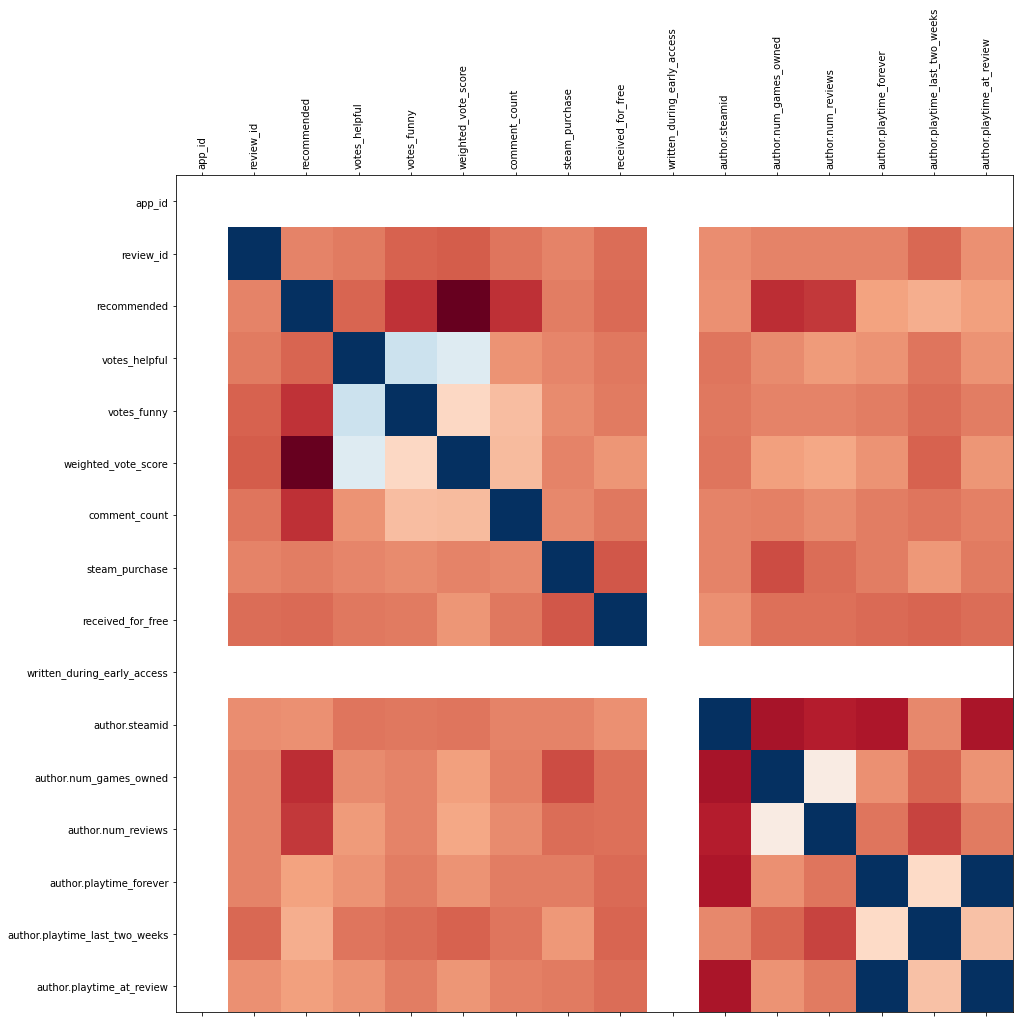

In [40]:
fig = plt.figure(figsize=(15,15))
plt.matshow(corr, cmap="RdBu", fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical");
plt.yticks(range(len(corr.columns)), corr.columns);

In [93]:
steam.info()
steam["app_name"].drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   app_id                          20000 non-null  int64         
 1   app_name                        20000 non-null  object        
 2   review_id                       20000 non-null  int64         
 3   language                        20000 non-null  object        
 4   review                          19934 non-null  object        
 5   timestamp_created               20000 non-null  datetime64[ns]
 6   timestamp_updated               20000 non-null  datetime64[ns]
 7   recommended                     20000 non-null  bool          
 8   votes_helpful                   20000 non-null  int64         
 9   votes_funny                     20000 non-null  int64         
 10  weighted_vote_score             20000 non-null  float64       
 11  co

0    The Witcher 3: Wild Hunt
Name: app_name, dtype: object